In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi 
from math import cos 
from math import exp
%matplotlib inline

In [208]:
def plotFunction(x, y):
    temp_figure = plt.figure()
    plt.plot(x, y)    
    plt.scatter(x,y)
    plt.title(y.name + " vs. " + x.name)
    plt.xlabel(x.name, fontsize=16)
    plt.ylabel(y.name, fontsize=16)
    plt.show()

In [209]:
Pi = 1000
Pb = 500
n = .03798
A = np.matrix([[1+n, -1*n, 0, 0],[-1*n, 1+2*n,-1*n,0],[0,-1*n,1+2*n,-1*n],[0,0,-1*n,1+3*n]])
b = np.matrix([[Pi],[Pi],[Pi],[Pi+2*500*n]])
b
p_at_n0_results = np.linalg.solve(A,b)
p_at_n0_results

matrix([[ 999.99843972],
        [ 999.95735796],
        [ 998.79352643],
        [ 965.86367141]])

In [210]:
p_at_n0_results[3] = p_at_n0_results[3] + 1000*n
p_at_n0_results
p_at_n1_results = np.linalg.solve(A,p_at_n0_results)
p_at_n1_results

matrix([[ 999.99262467],
        [ 999.83951671],
        [ 996.58369009],
        [ 935.14365223]])

In [211]:
Pi = 1000 #psi
k = 15 #md
phi = .25
mu = 1 # cp
Bw = 1
Ct = 1e-5 #psi^-1
L = 4000 # ft
alpha = 6.33e-3 * k/phi/mu/Ct

Pin = 0 #psi
Pout = 500 #psi
bc_in = 0 #(0 for Neumann, 1 for Dirichlet)
bc_out = 1

N = 10 #grid blocks
dt = 1 #day
dx = L/N
t_final = 1000 #days

P = 1000*np.ones(N)
A = np.zeros(N)
b = np.zeros(N)
I = np.eye(N)

In [212]:
#num_of_blocks = int(input("Enter the number of grid blocks: "))

In [213]:
# my_matrix_kplus1 = np.diag([-1*n]*(num_of_blocs-1),k=1)
# my_matrix_kminus1 = np.diag([-1*n]*(num_of_blocs-1),k=-1)
# my_matrix_k0 = np.diag([1+2*n]*(num_of_blocs),k=0)

In [214]:
# my_matrix = my_matrix_kplus1 + my_matrix_kminus1 + my_matrix_k0
# my_matrix

In [215]:
#my_matrix[num_of_blocks-1][num_of_blocks-1]

In [216]:
# if bc_in == 0:
#     my_matrix[0][0] -= n
# if bc_in == 1:
#     my_matrix[0][0] += n
# if bc_out == 1:
#     my_matrix[num_of_blocks-1][num_of_blocks-1] += n
# if bc_out == 0:
#     my_matrix[num_of_blocks-1][num_of_blocks-1] -= n

In [217]:
#my_matrix

In [218]:
# P = 1000*np.ones(num_of_blocks)
# P[num_of_blocks-1] += 2*Pb*n
# P
# p_at_n0_results = np.linalg.solve(my_matrix,p_at_n0_results)
# p_at_n0_results

In [219]:
def implicit(how_many_times_we_want_to_run, num_of_blocks, Pb, n):
    how_many_times_we_want_to_run = how_many_times_we_want_to_run
    num_of_blocks=num_of_blocks
    my_matrix = 0
    my_current_result = 0
    my_past_result = 0

    my_matrix_kplus1 = np.diag([-1*n]*(num_of_blocks-1),k=1)
    my_matrix_kminus1 = np.diag([-1*n]*(num_of_blocks-1),k=-1)
    my_matrix_k0 = np.diag([1+2*n]*(num_of_blocks),k=0)
    my_matrix = my_matrix_kplus1 + my_matrix_kminus1 + my_matrix_k0

    P = 1000*np.ones(num_of_blocks)
    P[num_of_blocks-1] += 2*Pb*n

    for index in range(1,how_many_times_we_want_to_run+1):

        my_matrix_kplus1 = np.diag([-1*n]*(num_of_blocks-1),k=1)
        my_matrix_kminus1 = np.diag([-1*n]*(num_of_blocks-1),k=-1)
        my_matrix_k0 = np.diag([1+2*n]*(num_of_blocks),k=0)
        my_matrix = my_matrix_kplus1 + my_matrix_kminus1 + my_matrix_k0

        if bc_in == 0: #if inlet is neuman or have no flow
            my_matrix[0][0] -= n
        if bc_in == 1: #if inlet is constant pressure
            my_matrix[0][0] += n
        if bc_out == 1: #if outlet is neuman or have no flow
            my_matrix[num_of_blocks-1][num_of_blocks-1] += n
        if bc_out == 0: #if outlet is constant in pressure
            my_matrix[num_of_blocks-1][num_of_blocks-1] -= n


        if index > 1:
            P = my_current_result
            P[num_of_blocks-1] += 2*Pb*n
        my_current_result = np.linalg.solve(my_matrix,P)
        #print("Result for iteration " + str(index))
        #print(my_current_result)
    return(my_current_result)


#### a. Verifying the result from my implicit function is the same as result obtained in problem 1

In [220]:
implicit(2, 4, 500, .03798)

array([ 999.99262467,  999.83951671,  996.58369009,  935.14365223])

#### B. Run code for N = 10

In [221]:
num_of_blocks = 10
dx = L/num_of_blocks
print("dx = " + str(dx))
eta = alpha*dt/dx/dx
print("eta = " + str(eta))
p_n_1 = implicit(1, num_of_blocks, 500, eta)
p_n_10 = implicit(10, num_of_blocks, 500, eta)
p_n_100 = implicit(100, num_of_blocks, 500, eta)

x = np.linspace(dx/2, L-(dx/2),num_of_blocks) #to plot pressures as points at the grid blocks centers
print(x)
print(p_n_100)

dx = 400.0
eta = 0.23737499999999997
[  200.   600.  1000.  1400.  1800.  2200.  2600.  3000.  3400.  3800.]
[ 853.37531462  844.93328538  828.20064112  803.48875644  771.28319138
  732.25849981  687.2874411   637.43873952  583.95923149  528.2389686 ]


#### Make a plot of pressure versus x and at three different times (choose 3 times that are interesting; a relatively early time, a middle time, and a time close to steady state). Plot pressures as points at the grid block centers – DO NOT connect the dots as lines.

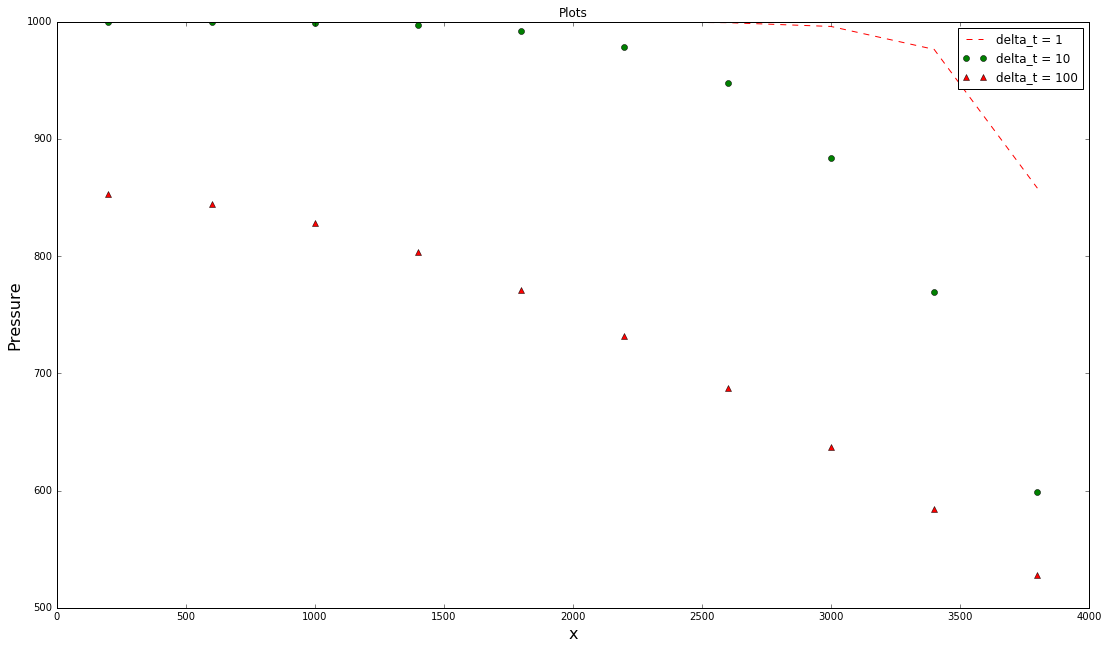

In [222]:
temp_figure = plt.figure()
temp_figure.set_size_inches(18.5, 10.5)
plt.plot(x, p_n_1,'r--',label="delta_t = 1")    
plt.plot(x, p_n_10,'go',label="delta_t = 10")    
plt.plot(x, p_n_100,'r^',label="delta_t = 100")    
plt.title("Plots")
plt.xlabel("x", fontsize=16)
plt.ylabel("Pressure", fontsize=16)
plt.legend()       
plt.show()

#### c.	On the same plot as part (b), plot the analytical solution at those same 3 time steps to make a comparison. The analytical solution is provided below

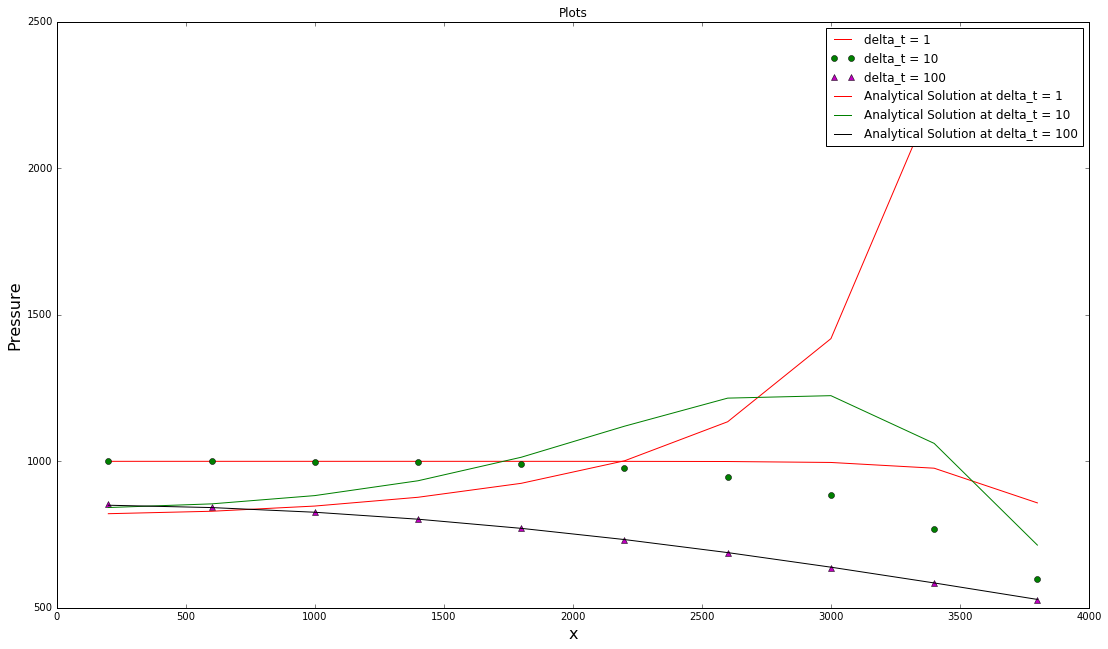

In [230]:
P0 = 1000
t_1 = 1
t_10 = 10
t_100 = 100
current_analytical_p_1 = Pb
current_analytical_p_10 = Pb
current_analytical_p_100 = Pb

for n in range(0, 1001):
    current_analytical_p_1 += 4*(Pb-P0)/pi*(-1)**(n+1)*np.cos(x*pi*(2*n+1)/(2*L))*exp((-1*alpha*pi**2*(2*n+1)**2*t_1)/(4*L**2))
    current_analytical_p_10 += 4*(Pb-P0)/pi*(-1)**(n+1)*np.cos(x*pi*(2*n+1)/(2*L))*exp((-1*alpha*pi**2*(2*n+1)**2*t_10)/(4*L**2))
    current_analytical_p_100 += 4*(Pb-P0)/pi*(-1)**(n+1)*np.cos(x*pi*(2*n+1)/(2*L))*exp((-1*alpha*pi**2*(2*n+1)**2*t_100)/(4*L**2))

temp_figure = plt.figure()
temp_figure.set_size_inches(18.5, 10.5)

plt.plot(x, p_n_1,'r-',label="delta_t = 1")    
plt.plot(x, p_n_10,'go',label="delta_t = 10")    
plt.plot(x, p_n_100,'m^',label="delta_t = 100")
plt.plot(x, current_analytical_p_1,'r',label="Analytical Solution at delta_t = 1")    
plt.plot(x, current_analytical_p_10,'g',label="Analytical Solution at delta_t = 10")    
plt.plot(x, current_analytical_p_100,'k',label="Analytical Solution at delta_t = 100")    

plt.title("Plots")
plt.xlabel("x", fontsize=16)
plt.ylabel("Pressure", fontsize=16)
plt.legend()       
plt.show()

Just from the three time steps plotted we can see that the higher the time steps, the closer the implicit approximation is to the analytical solution.

#### d.	From the criteria for the stability of the explicit method, find the maximum time-step size for which the explicit method is stable for N = 10 grid blocks. Then pick a time-step exactly 0.5 days longer than that maximum and plot the simulation results for both methods.

In [ ]:
## we run this until eta reaches the limit where it becomes unstable, which is .5

max_time_step = .5*(dx**2)/alpha

print("The max time step is: " + str(max_time_step))

In [ ]:
def explicit(how_many_times_we_want_to_run, num_of_blocks, Pb, n):

    how_many_times_we_want_to_run = how_many_times_we_want_to_run
    num_of_blocks=num_of_blocks
    my_matrix = 0
    my_current_result = 0
    my_past_result = 0

    my_matrix_kplus1 = np.diag([1*n]*(num_of_blocks-1),k=1)
    my_matrix_kminus1 = np.diag([1*n]*(num_of_blocks-1),k=-1)
    my_matrix_k0 = np.diag([-1*2*n]*(num_of_blocks),k=0)
    my_matrix = my_matrix_kplus1 + my_matrix_kminus1 + my_matrix_k0
    #print(my_matrix)

    if bc_in == 0: #if inlet is neuman or have no flow
        my_matrix[0][0] += n
    if bc_in == 1: #if inlet is constant pressure
        my_matrix[0][0] -= n
    if bc_out == 1: #if outlet is neuman or have no flow
        my_matrix[num_of_blocks-1][num_of_blocks-1] -= n
    if bc_out == 0: #if outlet is constant in pressure
        my_matrix[num_of_blocks-1][num_of_blocks-1] += n

    P = 1000*np.ones(num_of_blocks)
    for index in range(1,how_many_times_we_want_to_run+1):
        
        if index > 1:
            P = my_current_result
        my_current_result = P.dot(my_matrix)
        my_current_result = P + my_current_result

        my_current_result[num_of_blocks-1] += 2*Pb*n

    return(my_current_result)


The eta value for max time step of 2.1063717746182204 is 0.5
The eta value for time step of 2.6063717746182204 is 0.6186875


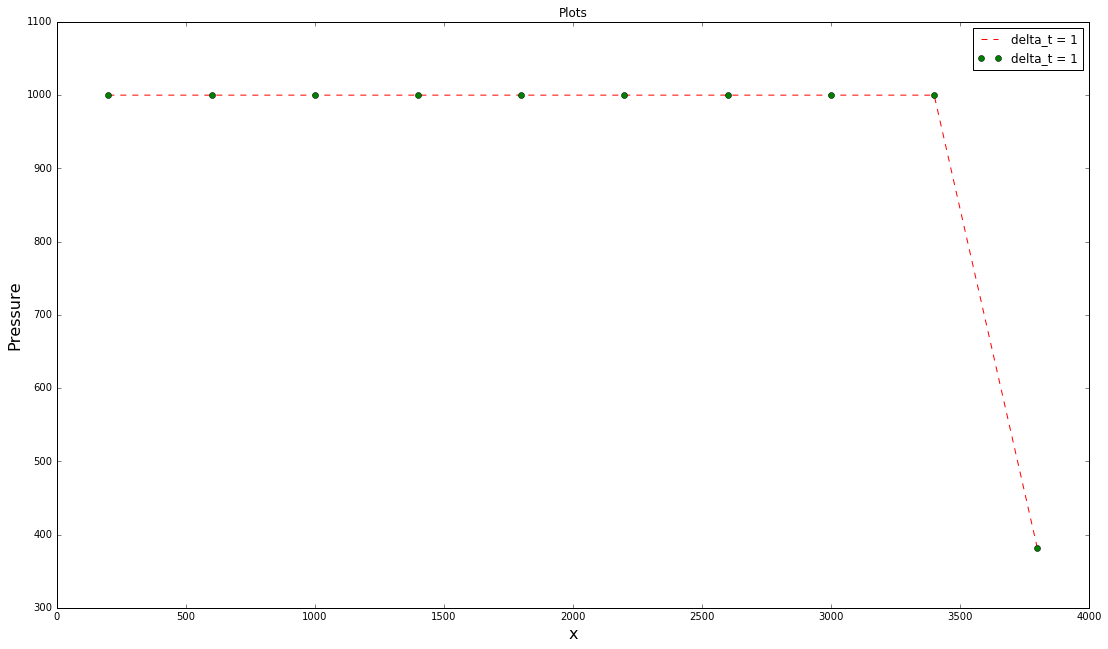

In [231]:
temp_figure = plt.figure()
temp_figure.set_size_inches(18.5, 10.5)

how_many_times_we_want_to_run = 10
num_of_blocks = 10
Pb = 500
n = alpha*max_time_step/(dx**2) 
print("The eta value for max time step of " + str(max_time_step) + " is " + str(n))

n_plus_point_5 = n = alpha*(max_time_step+.5)/(dx**2) 
print("The eta value for time step of " + str(max_time_step + .5) + " is " + str(n_plus_point_5))

x = np.linspace(dx/2, L-(dx/2),10) #to plot pressures as points at the grid blocks centers
explicity_n = explicit(1, num_of_blocks,Pb, n)
explicity_n_plus_point_5 = explicit(1, num_of_blocks,Pb, n_plus_point_5)

plt.plot(x, explicity_n,'r--',label="delta_t = 1")    
plt.plot(x, explicity_n_plus_point_5,'go',label="delta_t = 1")    

#plt.plot(x, p_n_10,'go',label="delta_t = 10")    
#plt.plot(x, p_n_100,'m^',label="delta_t = 100")
#plt.plot(x, current_analytical_p_1,'r',label="Analytical Solution at delta_t = 1")    
#plt.plot(x, current_analytical_p_10,'g',label="Analytical Solution at delta_t = 10")    
#plt.plot(x, current_analytical_p_100,'k',label="Analytical Solution at delta_t = 100")    

plt.title("Plots")
plt.xlabel("x", fontsize=16)
plt.ylabel("Pressure", fontsize=16)
plt.legend()       
plt.show()